# Setup

## Install Dependencies

In [2]:
%pip install opencv-python matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## Import Dependencies 

In [1]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import tensorflow dependencies - Functional API 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten 
import tensorflow as tf

## Set GPU Growth

In [3]:
# Avoid 00M errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth (gpu, True)

In [4]:
gpus[0]

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

## Create folder Structure

In [1]:
# Setup paths
POS_PATH = os.path.join ('data','positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join ('data', 'anchor')

NameError: name 'os' is not defined

In [6]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [Errno 17] File exists: 'data/positive'

# Collect Positives and Anchors

## Untar Labelled Faces in the Wild Dataset

In [14]:
# Move LFW Images to the following repository data/negative
!tar -xf lfw.tar

In [18]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join (NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

## Collect Positive and Anchor Classes

In [7]:
import uuid

In [106]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened( ):
    ret, frame = cap.read()
    
    # Cut down frame to 250×250px
    frame = cv2.flip(cv2.resize(frame[140:140+600, 700:700+600, :], (250, 250)), 1)
    
    # Collect anchors
    if cv2.waitKey(10) & 0xFF == ord('a'):
        # Create the unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
        
    # Collect positives
    if cv2.waitKey(10) & 0xFF == ord('b'):
        # Create the unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefulLy
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## Data Augmentation

In [161]:
def data_aug(img) :
    data = []
    for i in range(10):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed= (1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf. image. stateless_random_crop(img, size=(20, 20, 3), seed= (1, 2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100), np.random.randint(100)))
        # img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed = [0, 3])
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed= (np.random.randint(100), np.random.randint (100)))
        data.append(img)
    return data

In [153]:
img_path = os.path.join(ANC_PATH, '78808b7e-8df7-11ee-a19f-1e592a5e1493.jpg')
img = cv2.imread(img_path)
augmented_images = data_aug(img)
for image in augmented_images:
    # cv2.imwrite(os.path. join(ANC_PATH, '().jpg'.format (uuid.uuid1())), image.numpy ())
    cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())
    

In [155]:
for file_name in os.listdir(os.path.join(ANC_PATH)) :
    if file_name.endswith(".jpg"):
        img_path = os.path.join(ANC_PATH, file_name)
        img = cv2.imread(img_path)
        augmented_images = data_aug(img)
        for image in augmented_images:
            cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())
        

In [156]:
for file_name in os.listdir(os.path.join(POS_PATH)) :
    if file_name.endswith(".jpg"):
        img_path = os.path.join(POS_PATH, file_name)
        img = cv2.imread(img_path)
        augmented_images = data_aug(img)
        for image in augmented_images:
            cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [157]:
len(os.listdir(os.path.join(ANC_PATH)))

7201

In [158]:
len(os.listdir(os.path.join(POS_PATH)))

2301

## No face just background

In [159]:
NoFace_PATH = os.path.join('data','NoFace')

In [160]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened( ):
    ret, frame = cap.read()
    
    # Cut down frame to 250×250px
    frame = cv2.flip(cv2.resize(frame[140:140+600, 700:700+600, :], (250, 250)), 1)
    
    
        
    # Collect no_face images
    if cv2.waitKey(10) & 0xFF == ord('n'):
        # Create the unique file path
        imgname = os.path.join(NoFace_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefulLy
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [163]:
for file_name in os.listdir(os.path.join(NoFace_PATH)) :
    if file_name.endswith(".jpg"):
        img_path = os.path.join(NoFace_PATH, file_name)
        img = cv2.imread(img_path)
        augmented_images = data_aug(img)
        for image in augmented_images:
            cv2.imwrite(os.path.join(NoFace_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [164]:
len(os.listdir(os.path.join(NoFace_PATH)))

110

# Load and Preprocess images

## Get image directories

In [8]:
ANC_PATH + '*.jpg'

'data/anchor*.jpg'

In [165]:
anchor = tf.data.Dataset.list_files(ANC_PATH + '/*.jpg').take(2300)
positive = tf.data.Dataset.list_files(POS_PATH + '/*.jpg').take(2300)
negative = tf.data.Dataset.list_files(NEG_PATH + '/*.jpg').take(2200)

In [172]:
type(anchor)

tensorflow.python.data.ops.take_op._TakeDataset

In [173]:
# adding 100 NoFace images to negative
negative = negative.concatenate(tf.data.Dataset.list_files(NoFace_PATH + '/*.jpg').take(100))

In [174]:
len(negative)

2300

In [175]:
dir_test = negative.as_numpy_iterator()

In [184]:
dir_test.next()

b'data/negative/Larry_Wilmore_0001.jpg'

## Preprocessing - Scale and Resize

In [185]:
def preprocess (file_path):
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)
    # Preprocessing steps - resizing the image to be 100×100x3
    img = tf.image.resize(img, (100, 100))
    img = img / 255.0
    return img

In [186]:
img = preprocess(b'data/anchor/12d0ab50-89c5-11ee-a00c-1e592a5e1493.jpg')

In [187]:
img.numpy().max()

1.0

## Creat Labeled dataset

In [188]:
# (anchor, positive) =› 1, 1, 1, 1, 1
# (anchor, negative) => 0, 0, 0, 0, 0

In [189]:
tf.ones(len(positive))

<tf.Tensor: shape=(2300,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [190]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [191]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [192]:
samples = data.as_numpy_iterator()

In [195]:
examples =samples.next()

In [196]:
examples

(b'data/anchor/cf32136a-8dfd-11ee-a19f-1e592a5e1493.jpg',
 b'data/positive/0f9921e6-8dfe-11ee-a19f-1e592a5e1493.jpg',
 1.0)

## Build Train and Test partition

In [197]:
def preprocess_twin(input_img, validation_img, label):
    return (preprocess(input_img), preprocess(validation_img), label) 

In [198]:
preprocess_twin(*examples)

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.91862744, 0.86764705, 0.80490196],
         [0.92058825, 0.86960787, 0.8068628 ],
         [0.9191176 , 0.86813724, 0.80539215],
         ...,
         [0.9218137 , 0.87083334, 0.80808824],
         [0.9218137 , 0.87083334, 0.80808824],
         [0.9169118 , 0.8659314 , 0.8031863 ]],
 
        [[0.9218137 , 0.87083334, 0.80808824],
         [0.92156863, 0.87058824, 0.80784315],
         [0.92156863, 0.87058824, 0.80784315],
         ...,
         [0.9235294 , 0.87352943, 0.81078434],
         [0.9169118 , 0.86691177, 0.8041667 ],
         [0.91764706, 0.86764705, 0.80490196]],
 
        [[0.9254902 , 0.8745098 , 0.8117647 ],
         [0.92156863, 0.87058824, 0.80784315],
         [0.9245098 , 0.87352943, 0.81078434],
         ...,
         [0.92156863, 0.8745098 , 0.8117647 ],
         [0.91838235, 0.8713235 , 0.80857843],
         [0.9196078 , 0.872549  , 0.8098039 ]],
 
        ...,
 
        [[0.92941177, 0.88235295

In [199]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [200]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [207]:
samples = data.as_numpy_iterator()

In [208]:
samples.next()

(array([[[0.8901961 , 0.8352941 , 0.78431374],
         [0.8901961 , 0.8352941 , 0.78431374],
         [0.8901961 , 0.8352941 , 0.78431374],
         ...,
         [0.9137255 , 0.8784314 , 0.81960785],
         [0.9115196 , 0.87328434, 0.8232843 ],
         [0.9137255 , 0.8745098 , 0.827451  ]],
 
        [[0.8904412 , 0.8355392 , 0.78455883],
         [0.8901961 , 0.8352941 , 0.78431374],
         [0.89411765, 0.8392157 , 0.7882353 ],
         ...,
         [0.91568625, 0.877451  , 0.81960785],
         [0.9164216 , 0.8781863 , 0.82034314],
         [0.91568625, 0.8745098 , 0.827451  ]],
 
        [[0.89117646, 0.8362745 , 0.7852941 ],
         [0.8901961 , 0.8352941 , 0.78431374],
         [0.89411765, 0.8392157 , 0.7882353 ],
         ...,
         [0.922549  , 0.8754902 , 0.82058823],
         [0.92769605, 0.8806372 , 0.8257353 ],
         [0.9254902 , 0.8784314 , 0.8254902 ]],
 
        ...,
 
        [[0.9019608 , 0.85490197, 0.80784315],
         [0.9019608 , 0.85490197, 0.80784

In [214]:
# Training partition
train_data = data.take(round(len(data)*.9))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [215]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [216]:
# Testing partition
test_data = data.skip(round(len(data)*.1))
test_data = test_data.take(round(len(data)*.1))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [217]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

# Model Engineering

## Build Embedding layer

In [218]:
def make_embedding() :
    inp = Input(shape=(100, 100, 3), name = 'input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding= 'same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation= 'relu') (m1)
    m2 = MaxPooling2D(64, (2,2), padding= 'same')(c2)
    
    # Third block
    c3 = Conv2D (128, (4,4), activation='relu') (m2)
    m3 = MaxPooling2D (64, (2,2), padding= 'same') (c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation= 'relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    return Model(inputs=[inp], outputs= [d1], name='embedding')

In [219]:
embedding = make_embedding()

In [220]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 17, 17, 128)       26

## Build Distance layer

In [221]:
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()
        
    # Magic happens here
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [222]:
l1 = L1Dist()

In [223]:
l1

## Make Siamese Model

In [224]:
def make_siamese_model() :
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape= (100, 100, 3))
    
    # Validation image in the network
    validation_image = Input(name= 'validation_img', shape= (100, 100, 3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer
    classifier = Dense(1, activation='sigmoid')(distances)
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [225]:
siamese_model = make_siamese_model()

In [226]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# Training

## Set up Loss and Optimizer

In [227]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [228]:
opt = tf.keras.optimizers.legacy.Adam(1e-4) # 0.0001

In [ ]:
# to load pre_trained model weights
model.load(#path to checkpoint)

## Establish checkpoints

In [230]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt' )
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## Build Train Step Function

In [231]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [238]:
@tf.function
def train_step(batch):
    
    with tf.GradientTape() as tape:
        
        # Get anchor and positive/negative image
        X = batch[:2]
        
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    return loss

## Build training loop

In [242]:
def train (data, EPOCHS) :
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('In Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            
            yhat = siamese_model.predict(batch[: 2])
            
            r.update_state(batch[2], yhat) 
            p.update_state(batch[2], yhat)
            
            progbar.update(idx+1)
        
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
            
        # Save checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

## Train the model

In [243]:
EPOCHS = 20

In [244]:
train(train_data, EPOCHS)

In Epoch 1/20
187/259 [====================>.........] - ETA: 2:20

KeyboardInterrupt: 

# Verification Data 

In [44]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened( ):
    ret, frame = cap.read()
    
    # Cut down frame to 250×250px
    frame = cv2.flip(cv2.resize(frame[140:140+600, 700:700+600, :], (250, 250)), 1)
    
    # Collect verification data
    if cv2.waitKey(100) & 0xFF == ord('v'):
        # Create the unique file path
        imgname = os.path.join('app', 'application data', 'verification_images', '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
        
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefulLy
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

# Evaluate model

In [90]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [91]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [92]:
y_true

array([1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.],
      dtype=float32)

In [93]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 0s 72ms/step


array([[0.5004071 ],
       [0.5002447 ],
       [0.50016177],
       [0.4995925 ],
       [0.49960014],
       [0.50033015],
       [0.50076586],
       [0.50044453],
       [0.5017777 ],
       [0.5006536 ],
       [0.5008272 ],
       [0.5010692 ],
       [0.5010938 ],
       [0.50032437],
       [0.50131434],
       [0.5026835 ]], dtype=float32)

In [94]:
# Post processing the results
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [95]:
y_true

array([1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.],
      dtype=float32)

In [58]:
# Creating a metric object
m = Precision()
# Calculating the recall value
m.update_state(y_true, y_hat)
# Return Recall Result
m.result().numpy()

0.44444445

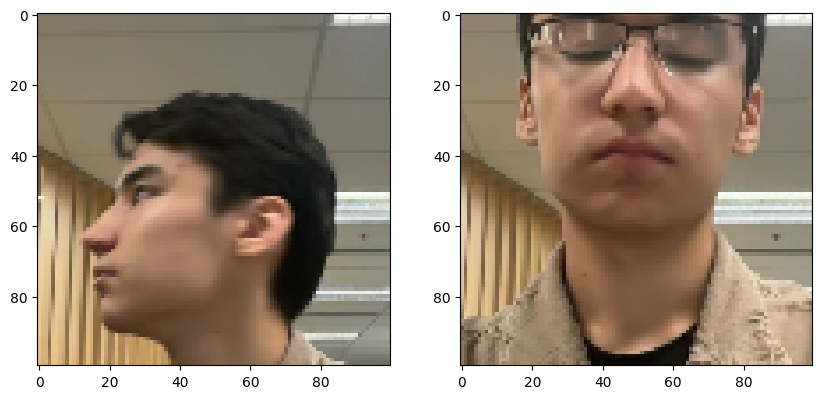

In [59]:
# Set plot size
plt.figure(figsize=(10,8))
# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input [3])
plt.subplot(1,2,2)
plt.imshow(test_val [3])
plt.show()

# Save model

In [192]:
# Save weights
siamese_model.save('siamesemodel.keras')

In [45]:
# Reload model
model = tf.keras.models.load_model('siamesemodel.keras', custom_objects={'L1Dist': L1Dist,'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [60]:
model.predict([test_input, test_val])

1/1 [==============================] - 0s 67ms/step


array([[1.0000000e+00],
       [9.8954684e-01],
       [3.9926911e-09],
       [9.7633207e-01],
       [5.0485484e-11],
       [3.2094306e-01],
       [1.0000000e+00],
       [9.7676176e-01],
       [1.0992136e-02],
       [1.3453713e-07],
       [4.8144222e-05],
       [2.7842888e-01],
       [1.0000000e+00],
       [1.4033277e-07],
       [8.3825845e-01],
       [4.5049757e-02]], dtype=float32)

In [196]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# Real Time Test

## Verification function

In [104]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    
    for image in os.listdir(os.path.join('application data','verification_images')):
        if image.endswith(".jpg"):
            validation_img = preprocess(os.path.join('application data','verification_images', image))
            input_img = preprocess(os.path.join('application data', 'input_image', 'input_image.jpg'))
        
            # Make Predictions
            result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)), verbose=0)
            results.append(result)
        
    # Detection Threshold: Metric above which a prediciton is considered positive
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples
    verification = detection / len(os.listdir(os.path.join('application data', 'verification_images')))
    verified = verification > verification_threshold
    
    return results, verified

In [102]:
for image in os.listdir(os.path.join('application data','verification_images')):
    if image.endswith(".jpg"):
        print(image)

af863892-8ddb-11ee-a19f-1e592a5e1493.jpg
92dff3ea-89c6-11ee-a00c-1e592a5e1493.jpg
009ea7d8-89c6-11ee-a00c-1e592a5e1493.jpg
fd68de4e-8ad8-11ee-8b6c-1e592a5e1493.jpg
ade3cc84-8ad9-11ee-8b6c-1e592a5e1493.jpg
acea0a64-8ddb-11ee-a19f-1e592a5e1493.jpg
af2458ca-8ad9-11ee-8b6c-1e592a5e1493.jpg
adfafb66-8ddb-11ee-a19f-1e592a5e1493.jpg
9dd3ecf2-8ad9-11ee-8b6c-1e592a5e1493.jpg
1ca21ede-89c5-11ee-a00c-1e592a5e1493.jpg
848aaff6-8ddb-11ee-a19f-1e592a5e1493.jpg
03207bda-89c6-11ee-a00c-1e592a5e1493.jpg
2c1e3fbe-89c5-11ee-a00c-1e592a5e1493.jpg
aec4a948-8ddb-11ee-a19f-1e592a5e1493.jpg
862f79a4-8ddb-11ee-a19f-1e592a5e1493.jpg
006dff98-89c6-11ee-a00c-1e592a5e1493.jpg
acc6de4a-8ad9-11ee-8b6c-1e592a5e1493.jpg
01c735a8-89c6-11ee-a00c-1e592a5e1493.jpg
a0ef6d80-8ddb-11ee-a19f-1e592a5e1493.jpg
9950c650-8ad9-11ee-8b6c-1e592a5e1493.jpg
987fd932-8ddb-11ee-a19f-1e592a5e1493.jpg
9b2ee498-8ddb-11ee-a19f-1e592a5e1493.jpg
1c9722b2-8ad9-11ee-8b6c-1e592a5e1493.jpg
011abb16-89c6-11ee-a00c-1e592a5e1493.jpg
a4278ca8-8ddb-11

## OpenCV Real Time Verification

In [97]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'app/application_data/input_image/input_image.jpg'

In [105]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened( ):
    ret, frame = cap.read()
    
    # Cut down frame to 250×250px
    frame = cv2.resize(frame[140:140+600, 700:700+600, :], (250, 250))
    
    # Collect anchors
    if cv2.waitKey(100) & 0xFF == ord('v'):
        # Save input image to application data/input image folder
        cv2.imwrite(os.path.join('application data', 'input_image', 'input_image.jpg'), frame)
        
        # Run verification
        results, verified = verify(model, 0.55, 0.5)
        print(verified)
        
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefulLy
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()
cv2.waitKey(1) 

True
True
True
True


-1

In [62]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     